In [1]:
# --------------------------------------------
# 1. IMPORT LIBRARIES
# --------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# --------------------------------------------
# 2. LOAD DATA
# --------------------------------------------
df = pd.read_csv('Titanic.csv')

In [3]:
# Preview data
print(df.head())
print(df.info())
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [4]:
# --------------------------------------------
# 3. CHECK MISSING VALUES
# --------------------------------------------
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# --------------------------------------------
# 4. HANDLE MISSING VALUES
# --------------------------------------------

# Fill Age missing values using median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked missing values using mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop cabin due to too many missing values
df = df.drop(columns=['Cabin'])

In [7]:
# --------------------------------------------
# 5. ENCODE CATEGORICAL VARIABLES
# --------------------------------------------

# Label Encoding for Sex (binary)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-Hot Encoding for Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print("\nAfter Encoding:")
print(df.head())



After Encoding:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  
4   

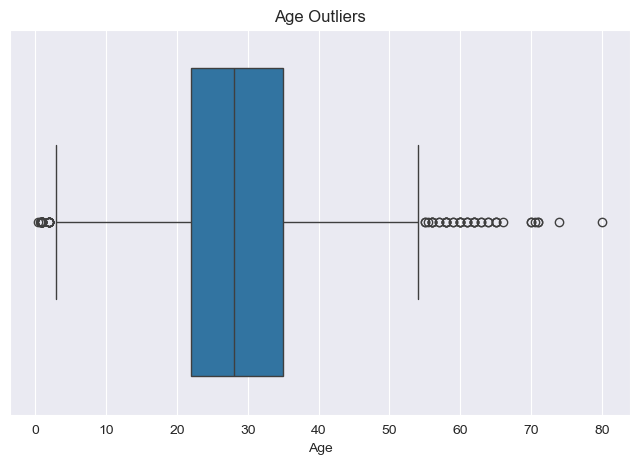

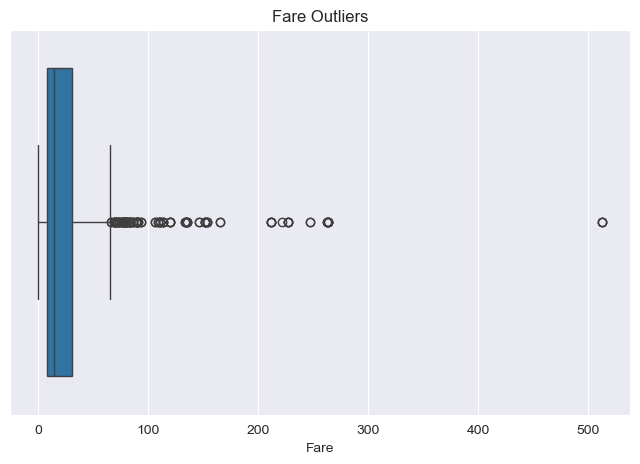

In [9]:
# --------------------------------------------
# 6. OUTLIER DETECTION (BOXPLOTS)
# --------------------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Age'])
plt.title("Age Outliers")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Fare'])
plt.title("Fare Outliers")
plt.show()

# Remove outliers using IQR method
def remove_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower) & (df[column] <= upper)]
    return df_filtered

df = remove_outliers('Fare')
df = remove_outliers('Age')


In [11]:
# --------------------------------------------
# 7. FEATURE SCALING (NORMALIZATION)
# --------------------------------------------
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nAfter Scaling:")
print(df.head())

# --------------------------------------------
# 8. SAVE CLEANED DATA
# --------------------------------------------


print("\nCleaned dataset saved as Titanic_Cleaned.csv")









After Scaling:
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    0  0.375000    0.2    0.0   
2                        Heikkinen, Miss. Laina    1  0.458333    0.0    0.0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.645833    0.2    0.0   
4                      Allen, Mr. William Henry    0  0.645833    0.0    0.0   
5                              Moran, Mr. James    0  0.500000    0.0    0.0   

             Ticket      Fare  Embarked_Q  Embarked_S  
0         A/5 21171  0.111538       False        True  
2  STON/O2. 3101282  0.121923       False        True  
3            113803  0.816923       False        True  
4            373450  0.123846       False        True  
5     